In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
keras.datasets.mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

# 검증세트
train_scaled, val_scaled, train_target, val_target = \
train_test_split(train_scaled, train_target, test_size=.2, random_state=42)

In [2]:
# 모델 생성
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', # 층을 늘릴거면 커널 개수를 늘려도 됨.. 64, 128, 256...
                              padding='same', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

# 밀집층, 완전연결층
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

In [3]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=10)

Train on 48000 samples
Epoch 1/10
48000/48000 [==============================] - 28s 592us/sample - loss: 0.2284 - accuracy: 0.9299
Epoch 2/10
48000/48000 [==============================] - 28s 592us/sample - loss: 0.0865 - accuracy: 0.9740
Epoch 3/10
48000/48000 [==============================] - 27s 560us/sample - loss: 0.0605 - accuracy: 0.9822
Epoch 4/10
48000/48000 [==============================] - 27s 558us/sample - loss: 0.0485 - accuracy: 0.9849
Epoch 5/10
48000/48000 [==============================] - 27s 560us/sample - loss: 0.0399 - accuracy: 0.9877
Epoch 6/10
48000/48000 [==============================] - 28s 573us/sample - loss: 0.0318 - accuracy: 0.9901
Epoch 7/10
48000/48000 [==============================] - 27s 554us/sample - loss: 0.0285 - accuracy: 0.9909
Epoch 8/10
48000/48000 [==============================] - 26s 549us/sample - loss: 0.0245 - accuracy: 0.9922
Epoch 9/10
48000/48000 [==============================] - 27s 555us/sample - loss: 0.0216 - accuracy: 0.9

In [4]:
from PIL import Image

In [38]:
image = Image.open('D:/python3/data/7p.png')
import matplotlib.pyplot as plt
%matplotlib inline

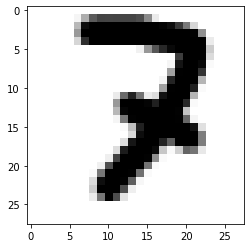

In [39]:
plt.imshow(image)

In [40]:
image.size

(28, 28)

In [41]:
import numpy as np
image = ((np.array(image) / 255.0 ) -1 ) *1  # png타입을 스케일링

In [42]:
a = model.predict(np.reshape(image, (1, 28, 28, 1)))  # 하나의 데이터 불러올 때,,
a

array([[0.0349104 , 0.1259725 , 0.01714758, 0.21651185, 0.02003571,
        0.3057587 , 0.06040382, 0.02933895, 0.11310337, 0.07681704]],
      dtype=float32)

https://www.photopea.com
무료 포토샵

In [27]:
max(a[0])

0.3057587

In [43]:
list(a[0]).index(max(a[0]))

5

http://datascienceschool.net/intro.html